# MATRIXS REQUIRED TO DISPLAY

1. Each and every model with hyperparameter tuning (learning rate).

2. Validation loss curve, Training loss curve, Validation accuracy curve

3. Model training performance matrices (precision, recall, and F1 score)

4. Model testing performance matrices (precision, recall, and F1 score)

5. Number of epochs model trained on.

6. Dataset Before and After Augmentation.

7. Testing Confusion matrix.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from PIL import Image
import os
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import zipfile

import torch.nn.functional as F
from rich.console import Console
from rich.progress import Progress, BarColumn, TimeElapsedColumn, TimeRemainingColumn
from rich.table import Table

import pandas as pd
from torch.cuda.amp import autocast, GradScaler


from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# Install Git in case it's not available in your environment
!apt-get install git

# Clone the repository from GitHub
!git clone https://github.com/Samin1362/MerakiNexus-V2.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.14).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Cloning into 'MerakiNexus-V2'...
remote: Enumerating objects: 6495, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 6495 (delta 0), reused 3 (delta 0), pack-reused 6479 (from 2)
Receiving objects: 100% (6495/6495), 1.92 GiB | 16.61 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (6234/6234), done.


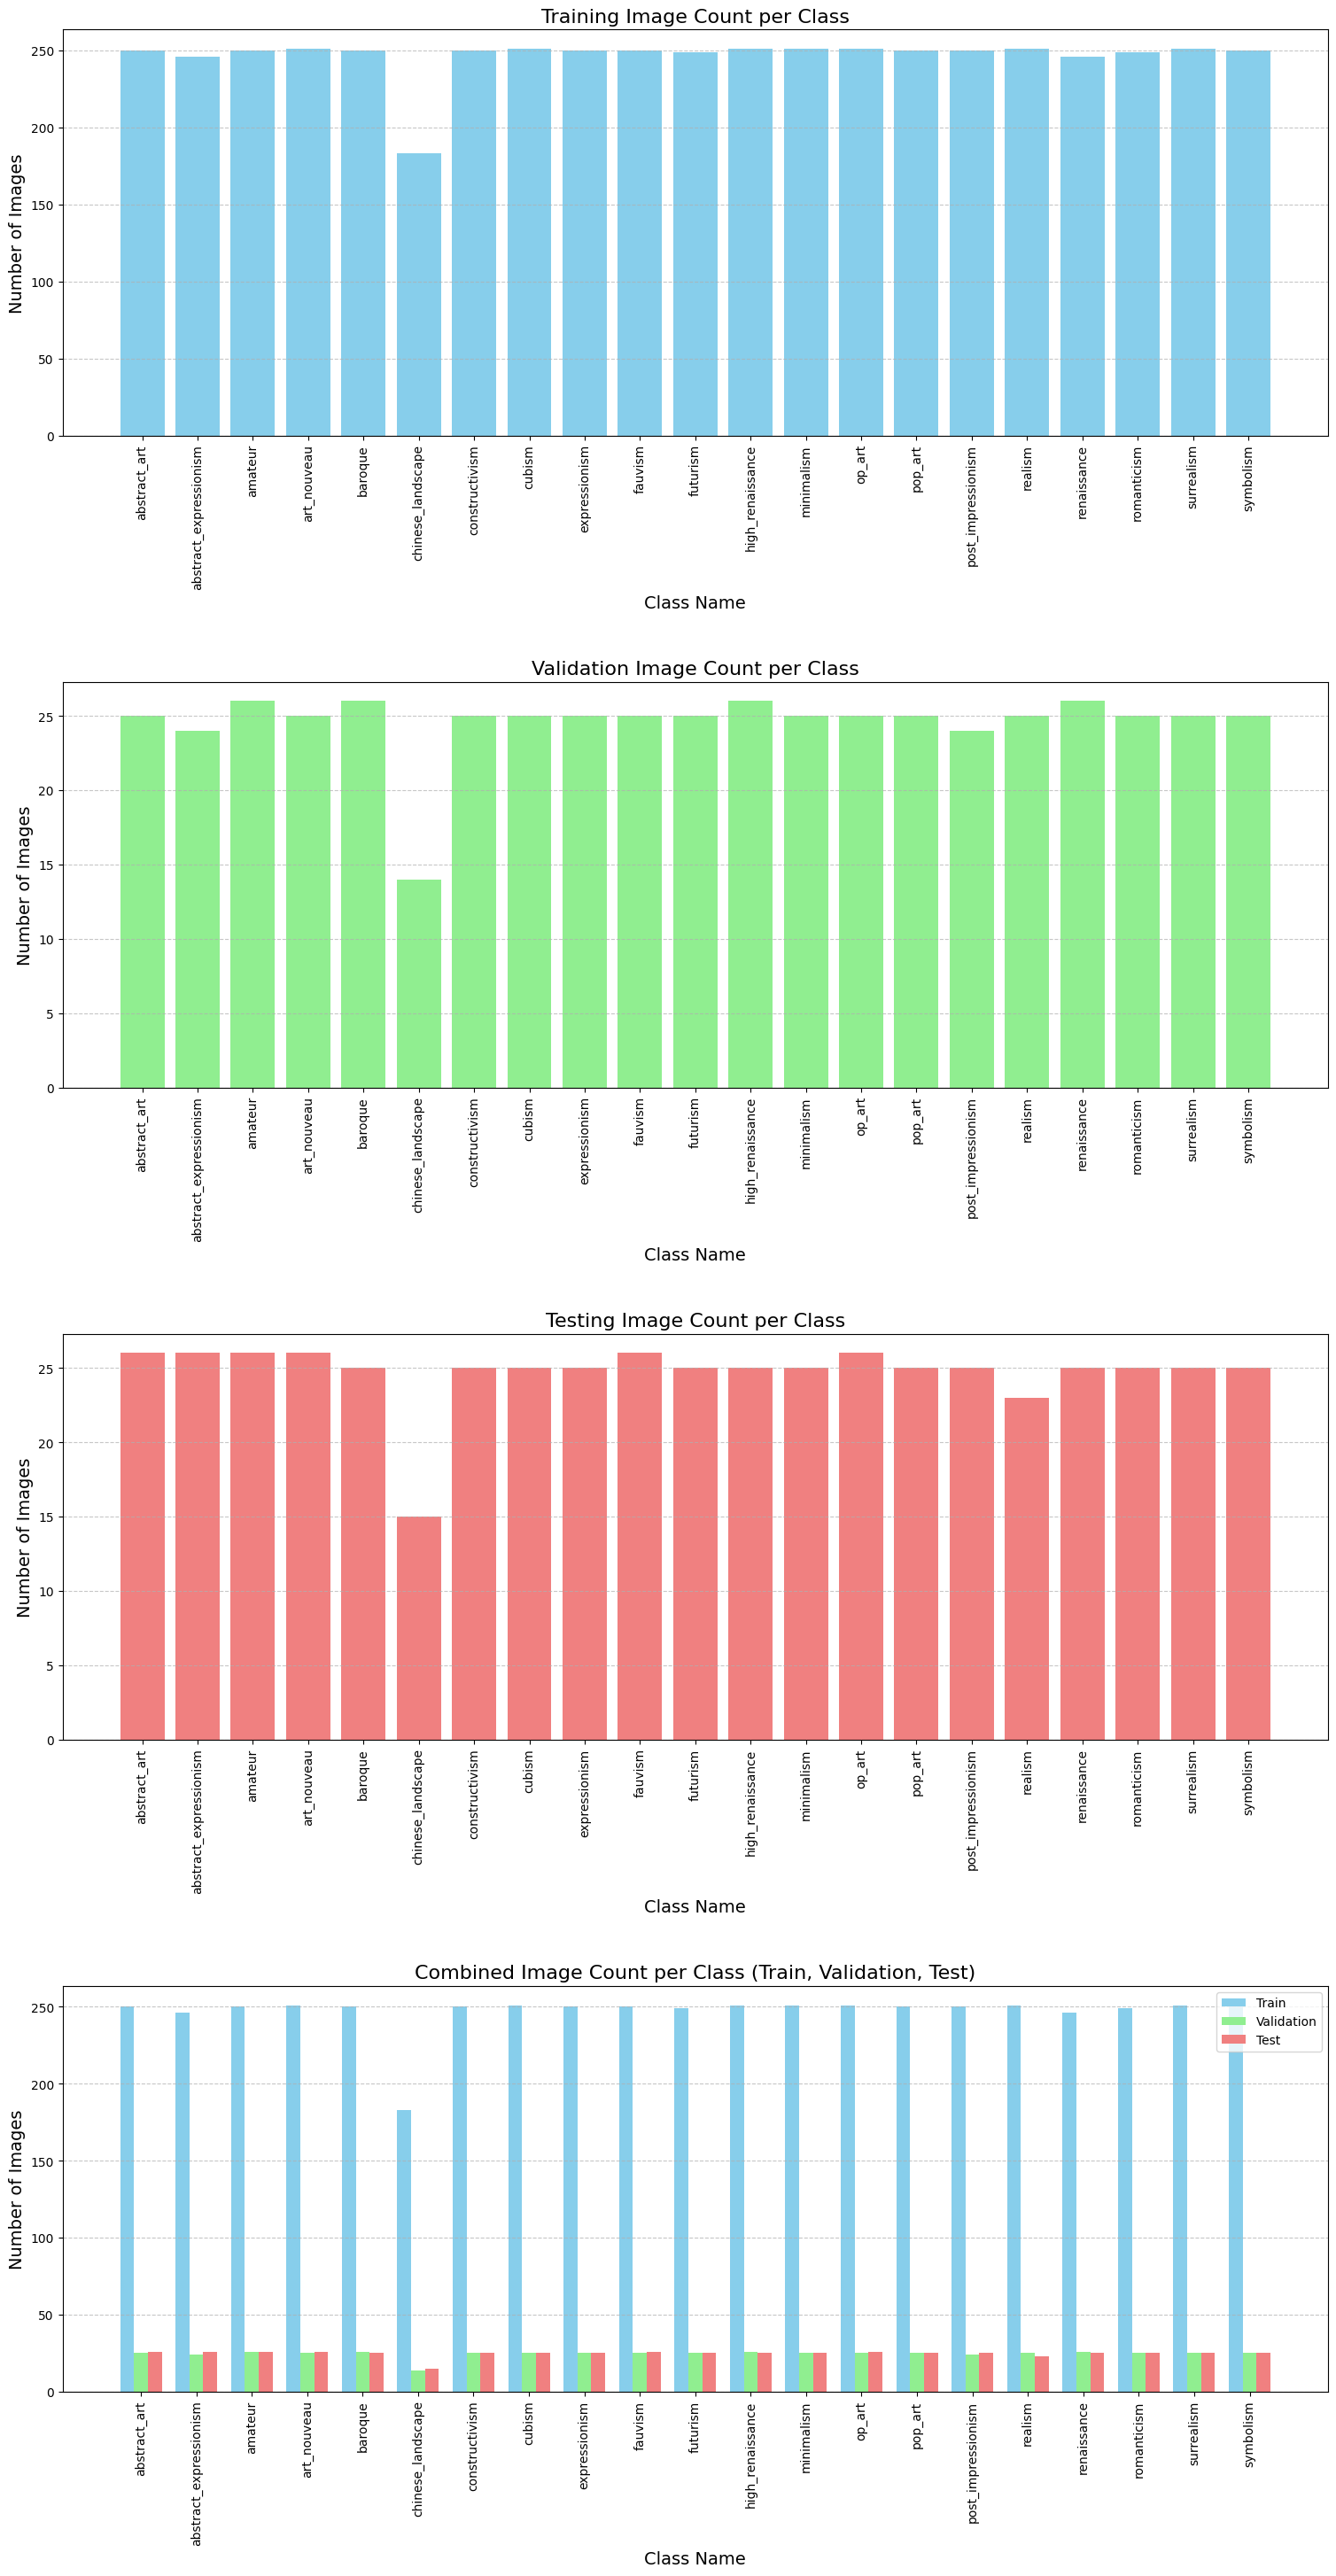

In [3]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets

# Define dataset path
dataset_path = "/content/MerakiNexus-V2/art_classification_model/dataset"  # Update path if needed

# Load datasets
train_dataset = datasets.ImageFolder(root=f"{dataset_path}/train")
val_dataset = datasets.ImageFolder(root=f"{dataset_path}/val")
test_dataset = datasets.ImageFolder(root=f"{dataset_path}/test")

# Get class names and initialize counters
class_names = train_dataset.classes
train_image_counts, val_image_counts, test_image_counts = [], [], []

# Count images per class
for class_name in class_names:
    train_count = len(os.listdir(os.path.join(train_dataset.root, class_name)))
    val_count = len(os.listdir(os.path.join(val_dataset.root, class_name)))
    test_count = len(os.listdir(os.path.join(test_dataset.root, class_name)))

    train_image_counts.append(train_count)
    val_image_counts.append(val_count)
    test_image_counts.append(test_count)

# Create vertically stacked subplots
fig, axes = plt.subplots(4, 1, figsize=(16, 30))  # Wider + taller for readability

# Common x-axis style
def style_x_axis(ax):
    ax.set_xticks(range(len(class_names)))
    ax.set_xticklabels(class_names, rotation=90, fontsize=10)
    ax.set_xlabel("Class Name", fontsize=14)
    ax.set_ylabel("Number of Images", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Training set plot
axes[0].bar(range(len(class_names)), train_image_counts, color='skyblue')
axes[0].set_title('Training Image Count per Class', fontsize=16)
style_x_axis(axes[0])

# Validation set plot
axes[1].bar(range(len(class_names)), val_image_counts, color='lightgreen')
axes[1].set_title('Validation Image Count per Class', fontsize=16)
style_x_axis(axes[1])

# Test set plot
axes[2].bar(range(len(class_names)), test_image_counts, color='lightcoral')
axes[2].set_title('Testing Image Count per Class', fontsize=16)
style_x_axis(axes[2])

# Combined view with grouped bars
bar_width = 0.25
x = list(range(len(class_names)))

axes[3].bar([i - bar_width for i in x], train_image_counts, width=bar_width, label='Train', color='skyblue')
axes[3].bar(x, val_image_counts, width=bar_width, label='Validation', color='lightgreen')
axes[3].bar([i + bar_width for i in x], test_image_counts, width=bar_width, label='Test', color='lightcoral')

axes[3].set_title('Combined Image Count per Class (Train, Validation, Test)', fontsize=16)
axes[3].set_xticks(x)
axes[3].set_xticklabels(class_names, rotation=90, fontsize=10)
axes[3].set_xlabel("Class Name", fontsize=14)
axes[3].set_ylabel("Number of Images", fontsize=14)
axes[3].legend()
axes[3].grid(axis='y', linestyle='--', alpha=0.7)

# Final layout adjustments
plt.tight_layout(pad=4)
plt.show()


Train samples: 5168 | Val samples: 512 | Test samples: 511


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 144MB/s]



Starting Training...



Epoch 1/25 Training: 100%|██████████| 162/162 [01:25<00:00,  1.90it/s, loss=1.14]


Epoch 1 Completed | Train Loss: 2.1878 | Val Loss: 1.6407 | Val Acc: 49.80% | Time: 92.87s


Epoch 2/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.91it/s, loss=1.63]


Epoch 2 Completed | Train Loss: 1.3074 | Val Loss: 1.4890 | Val Acc: 55.66% | Time: 91.52s


Epoch 3/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.92it/s, loss=0.559]


Epoch 3 Completed | Train Loss: 0.9503 | Val Loss: 1.4597 | Val Acc: 56.84% | Time: 92.21s


Epoch 4/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.91it/s, loss=0.748]


Epoch 4 Completed | Train Loss: 0.7101 | Val Loss: 1.3142 | Val Acc: 62.11% | Time: 92.21s


Epoch 5/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.92it/s, loss=0.788]


Epoch 5 Completed | Train Loss: 0.5157 | Val Loss: 1.4189 | Val Acc: 61.91% | Time: 91.74s


Epoch 6/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.92it/s, loss=0.554]


Epoch 6 Completed | Train Loss: 0.3915 | Val Loss: 1.3852 | Val Acc: 64.45% | Time: 91.80s


Epoch 7/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.92it/s, loss=0.237]


Epoch 7 Completed | Train Loss: 0.3313 | Val Loss: 1.4755 | Val Acc: 63.48% | Time: 91.76s


Epoch 8/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.93it/s, loss=0.363]


Epoch 8 Completed | Train Loss: 0.2541 | Val Loss: 1.4387 | Val Acc: 63.48% | Time: 91.46s


Epoch 9/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.93it/s, loss=0.386]


Epoch 9 Completed | Train Loss: 0.2204 | Val Loss: 1.5538 | Val Acc: 61.72% | Time: 91.48s


Epoch 10/25 Training: 100%|██████████| 162/162 [01:25<00:00,  1.90it/s, loss=0.371]


Epoch 10 Completed | Train Loss: 0.1904 | Val Loss: 1.5743 | Val Acc: 61.52% | Time: 92.52s


Epoch 11/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.93it/s, loss=0.136]


Epoch 11 Completed | Train Loss: 0.1803 | Val Loss: 1.6994 | Val Acc: 60.55% | Time: 91.35s


Epoch 12/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.92it/s, loss=0.617]


Epoch 12 Completed | Train Loss: 0.1644 | Val Loss: 1.5928 | Val Acc: 59.38% | Time: 91.67s


Epoch 13/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.94it/s, loss=0.235]


Epoch 13 Completed | Train Loss: 0.1351 | Val Loss: 1.5438 | Val Acc: 62.89% | Time: 90.94s


Epoch 14/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.93it/s, loss=0.0534]


Epoch 14 Completed | Train Loss: 0.1144 | Val Loss: 1.5137 | Val Acc: 63.48% | Time: 91.29s


Epoch 15/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.93it/s, loss=0.368]


Epoch 15 Completed | Train Loss: 0.1249 | Val Loss: 1.5535 | Val Acc: 64.45% | Time: 91.17s


Epoch 16/25 Training: 100%|██████████| 162/162 [01:24<00:00,  1.92it/s, loss=0.315]


Epoch 16 Completed | Train Loss: 0.1371 | Val Loss: 1.6736 | Val Acc: 61.91% | Time: 91.90s


Epoch 17/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.94it/s, loss=0.272]


Epoch 17 Completed | Train Loss: 0.1276 | Val Loss: 1.7079 | Val Acc: 62.50% | Time: 90.93s


Epoch 18/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.93it/s, loss=0.188]


Epoch 18 Completed | Train Loss: 0.1063 | Val Loss: 1.8198 | Val Acc: 60.74% | Time: 91.32s


Epoch 19/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.94it/s, loss=0.0658]


Epoch 19 Completed | Train Loss: 0.1074 | Val Loss: 1.9345 | Val Acc: 60.55% | Time: 90.91s


Epoch 20/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.93it/s, loss=0.142]


Epoch 20 Completed | Train Loss: 0.0949 | Val Loss: 1.7696 | Val Acc: 61.91% | Time: 91.18s


Epoch 21/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.95it/s, loss=0.0899]


Epoch 21 Completed | Train Loss: 0.0935 | Val Loss: 1.8220 | Val Acc: 60.55% | Time: 90.64s


Epoch 22/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.94it/s, loss=0.212]


Epoch 22 Completed | Train Loss: 0.0802 | Val Loss: 1.6984 | Val Acc: 63.67% | Time: 90.37s


Epoch 23/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.94it/s, loss=0.245]


Epoch 23 Completed | Train Loss: 0.0878 | Val Loss: 1.7072 | Val Acc: 61.72% | Time: 90.77s


Epoch 24/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.94it/s, loss=0.0795]


Epoch 24 Completed | Train Loss: 0.0770 | Val Loss: 1.6638 | Val Acc: 62.89% | Time: 90.54s


Epoch 25/25 Training: 100%|██████████| 162/162 [01:23<00:00,  1.94it/s, loss=0.0413]


Epoch 25 Completed | Train Loss: 0.0835 | Val Loss: 1.9662 | Val Acc: 63.28% | Time: 91.15s

Total Training Time: 2285.72s (38.10 minutes)


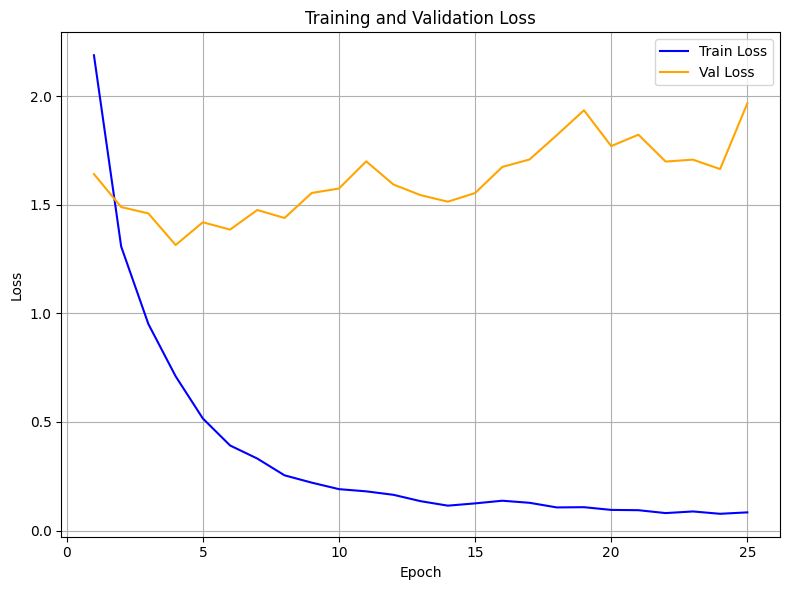

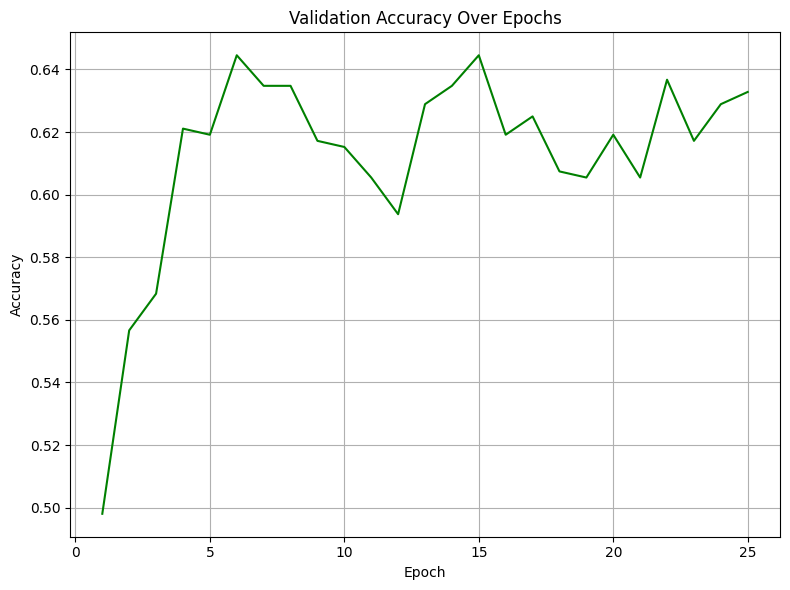

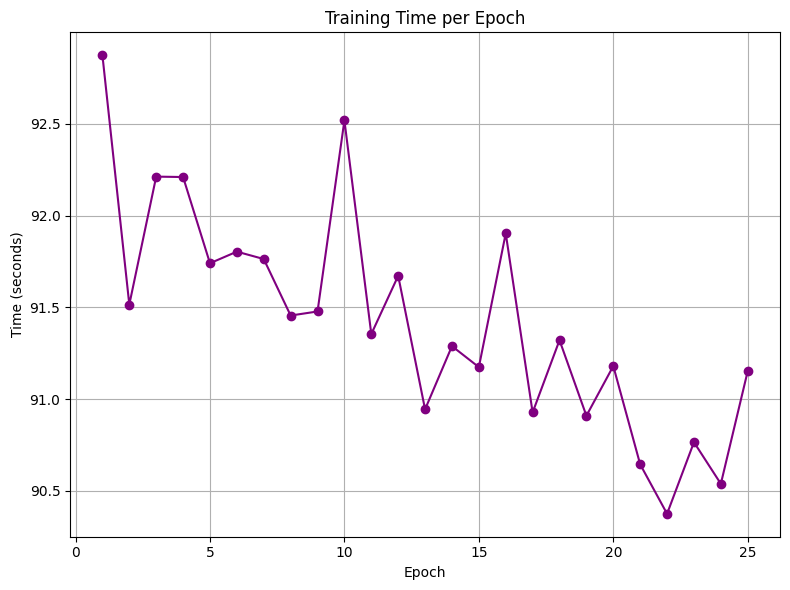


Test Accuracy: 61.06%

Precision, Recall, F1-Score Table:

                        precision  recall  f1-score
abstract_art                0.300   0.360     0.327
abstract_expressionism      0.611   0.440     0.512
amateur                     0.733   0.880     0.800
art_nouveau                 0.474   0.360     0.409
baroque                     0.720   0.750     0.735
chinese_landscape           0.765   0.929     0.839
constructivism              0.714   0.400     0.513
cubism                      0.900   0.360     0.514
expressionism               0.469   0.600     0.526
fauvism                     0.407   0.440     0.423
futurism                    0.542   0.520     0.531
high_renaissance            0.800   0.640     0.711
minimalism                  0.600   0.840     0.700
op_art                      0.720   0.720     0.720
pop_art                     0.577   0.600     0.588
post_impressionism          0.583   0.560     0.571
realism                     0.789   0.652     0.714
rena

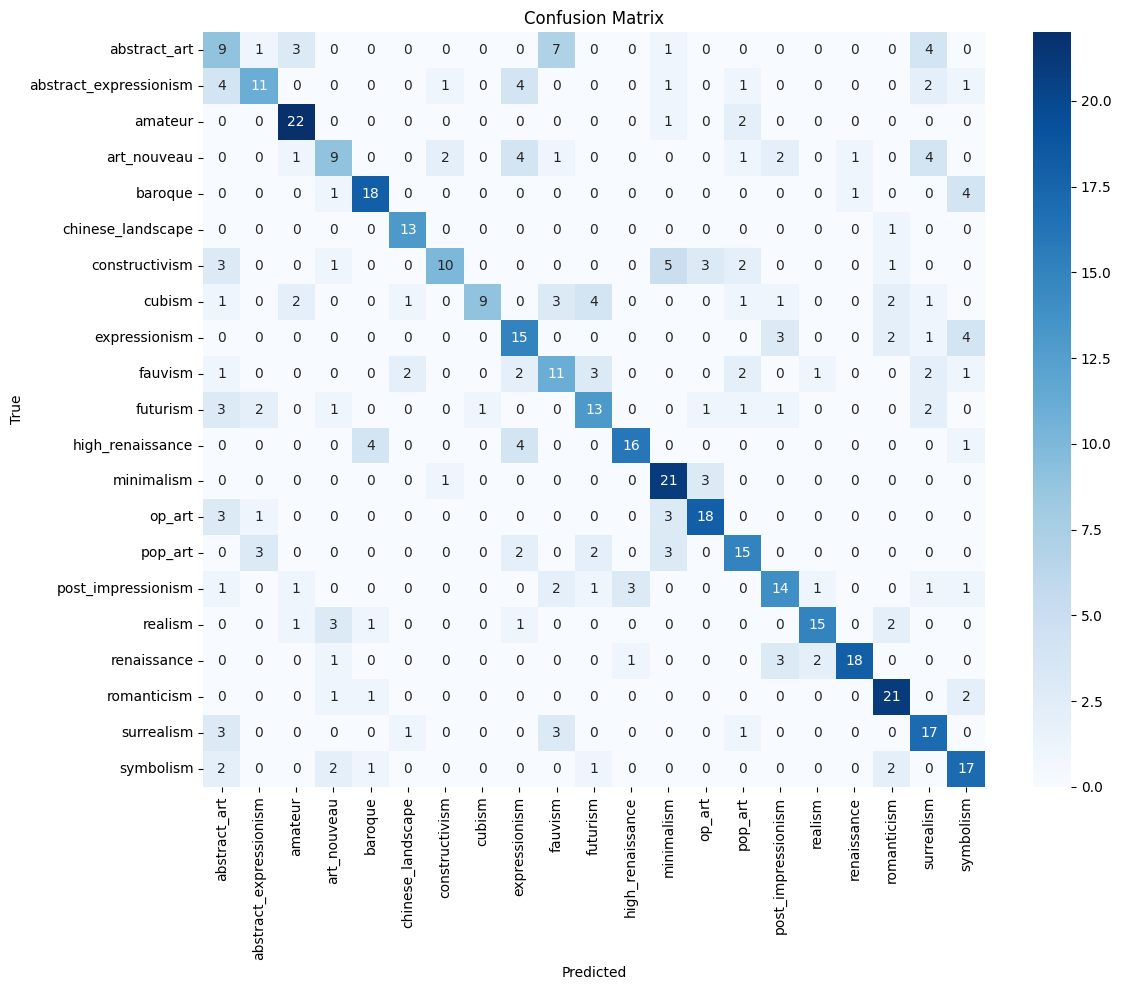

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm import tqdm
import pandas as pd
import time

# ======== Device Configuration ========
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ======== Data Transforms ========
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ======== Dataset and DataLoaders ========
dataset_path = "/content/MerakiNexus-V2/art_classification_model/dataset"
train_data = datasets.ImageFolder(root=f"{dataset_path}/train", transform=transform)
val_data = datasets.ImageFolder(root=f"{dataset_path}/val", transform=transform)
test_data = datasets.ImageFolder(root=f"{dataset_path}/test", transform=transform)

print(f"Train samples: {len(train_data)} | Val samples: {len(val_data)} | Test samples: {len(test_data)}")

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ======== ResNet101-based Model ========
class ArtworkClassificationResNet101(nn.Module):
    def __init__(self, num_classes=11):
        super(ArtworkClassificationResNet101, self).__init__()
        self.resnet = models.resnet101(pretrained=True)

        # Freeze all layers
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Unfreeze last block (layer4)
        for param in self.resnet.layer4.parameters():
            param.requires_grad = True

        # Replace the FC layer
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.resnet(x)

model = ArtworkClassificationResNet101(num_classes=len(train_data.classes)).to(device)

# ======== Loss Function and Optimizer ========
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4, weight_decay=1e-5)

# ======== Training Loop ========
num_epochs = 25
train_losses = []
val_losses = []
val_accuracies = []
epoch_times = []

print("\nStarting Training...\n")
for epoch in range(num_epochs):
    epoch_start = time.time()
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training") as tepoch:
        for images, labels in tepoch:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            tepoch.set_postfix(loss=loss.item())

    train_loss_epoch = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss_epoch)

    # ======== Validation ========
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = outputs.argmax(dim=1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    val_loss_epoch = val_loss / len(val_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss_epoch)
    val_accuracies.append(val_accuracy)

    epoch_duration = time.time() - epoch_start
    epoch_times.append(epoch_duration)

    print(f"Epoch {epoch+1} Completed | Train Loss: {train_loss_epoch:.4f} | Val Loss: {val_loss_epoch:.4f} | Val Acc: {val_accuracy*100:.2f}% | Time: {epoch_duration:.2f}s")

total_training_time = sum(epoch_times)
print(f"\nTotal Training Time: {total_training_time:.2f}s ({total_training_time/60:.2f} minutes)")

# ======== Plotting ========

# Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label="Val Loss", color='orange')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), val_accuracies, label="Val Accuracy", color='green')
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Per Epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs+1), epoch_times, marker='o', color='purple')
plt.title("Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ======== Evaluation on Test Set ========
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# ======== Classification Report & Confusion Matrix ========
report = classification_report(all_labels, all_preds, target_names=train_data.classes, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("\nPrecision, Recall, F1-Score Table:\n")
print(df_report[['precision', 'recall', 'f1-score']].round(3))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_data.classes,
            yticklabels=train_data.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [6]:
scripted_model = torch.jit.script(model)  # Convert to TorchScript

# Save the TorchScript model to a file
torch.jit.save(scripted_model, "/content/artwork_classification_model_subject_2_resNet_101.pth");


✅ Test Accuracy: 61.06%

📊 Classification Report (per class):

                        precision  recall  f1-score
abstract_art                0.318   0.280     0.298
abstract_expressionism      0.579   0.440     0.500
amateur                     0.655   0.760     0.704
art_nouveau                 0.368   0.280     0.318
baroque                     0.720   0.750     0.735
chinese_landscape           0.591   0.929     0.722
constructivism              0.857   0.480     0.615
cubism                      0.786   0.440     0.564
expressionism               0.406   0.520     0.456
fauvism                     0.379   0.440     0.407
futurism                    0.654   0.680     0.667
high_renaissance            0.765   0.520     0.619
minimalism                  0.618   0.840     0.712
op_art                      0.690   0.800     0.741
pop_art                     0.607   0.680     0.642
post_impressionism          0.545   0.480     0.511
realism                     0.680   0.739     0.708


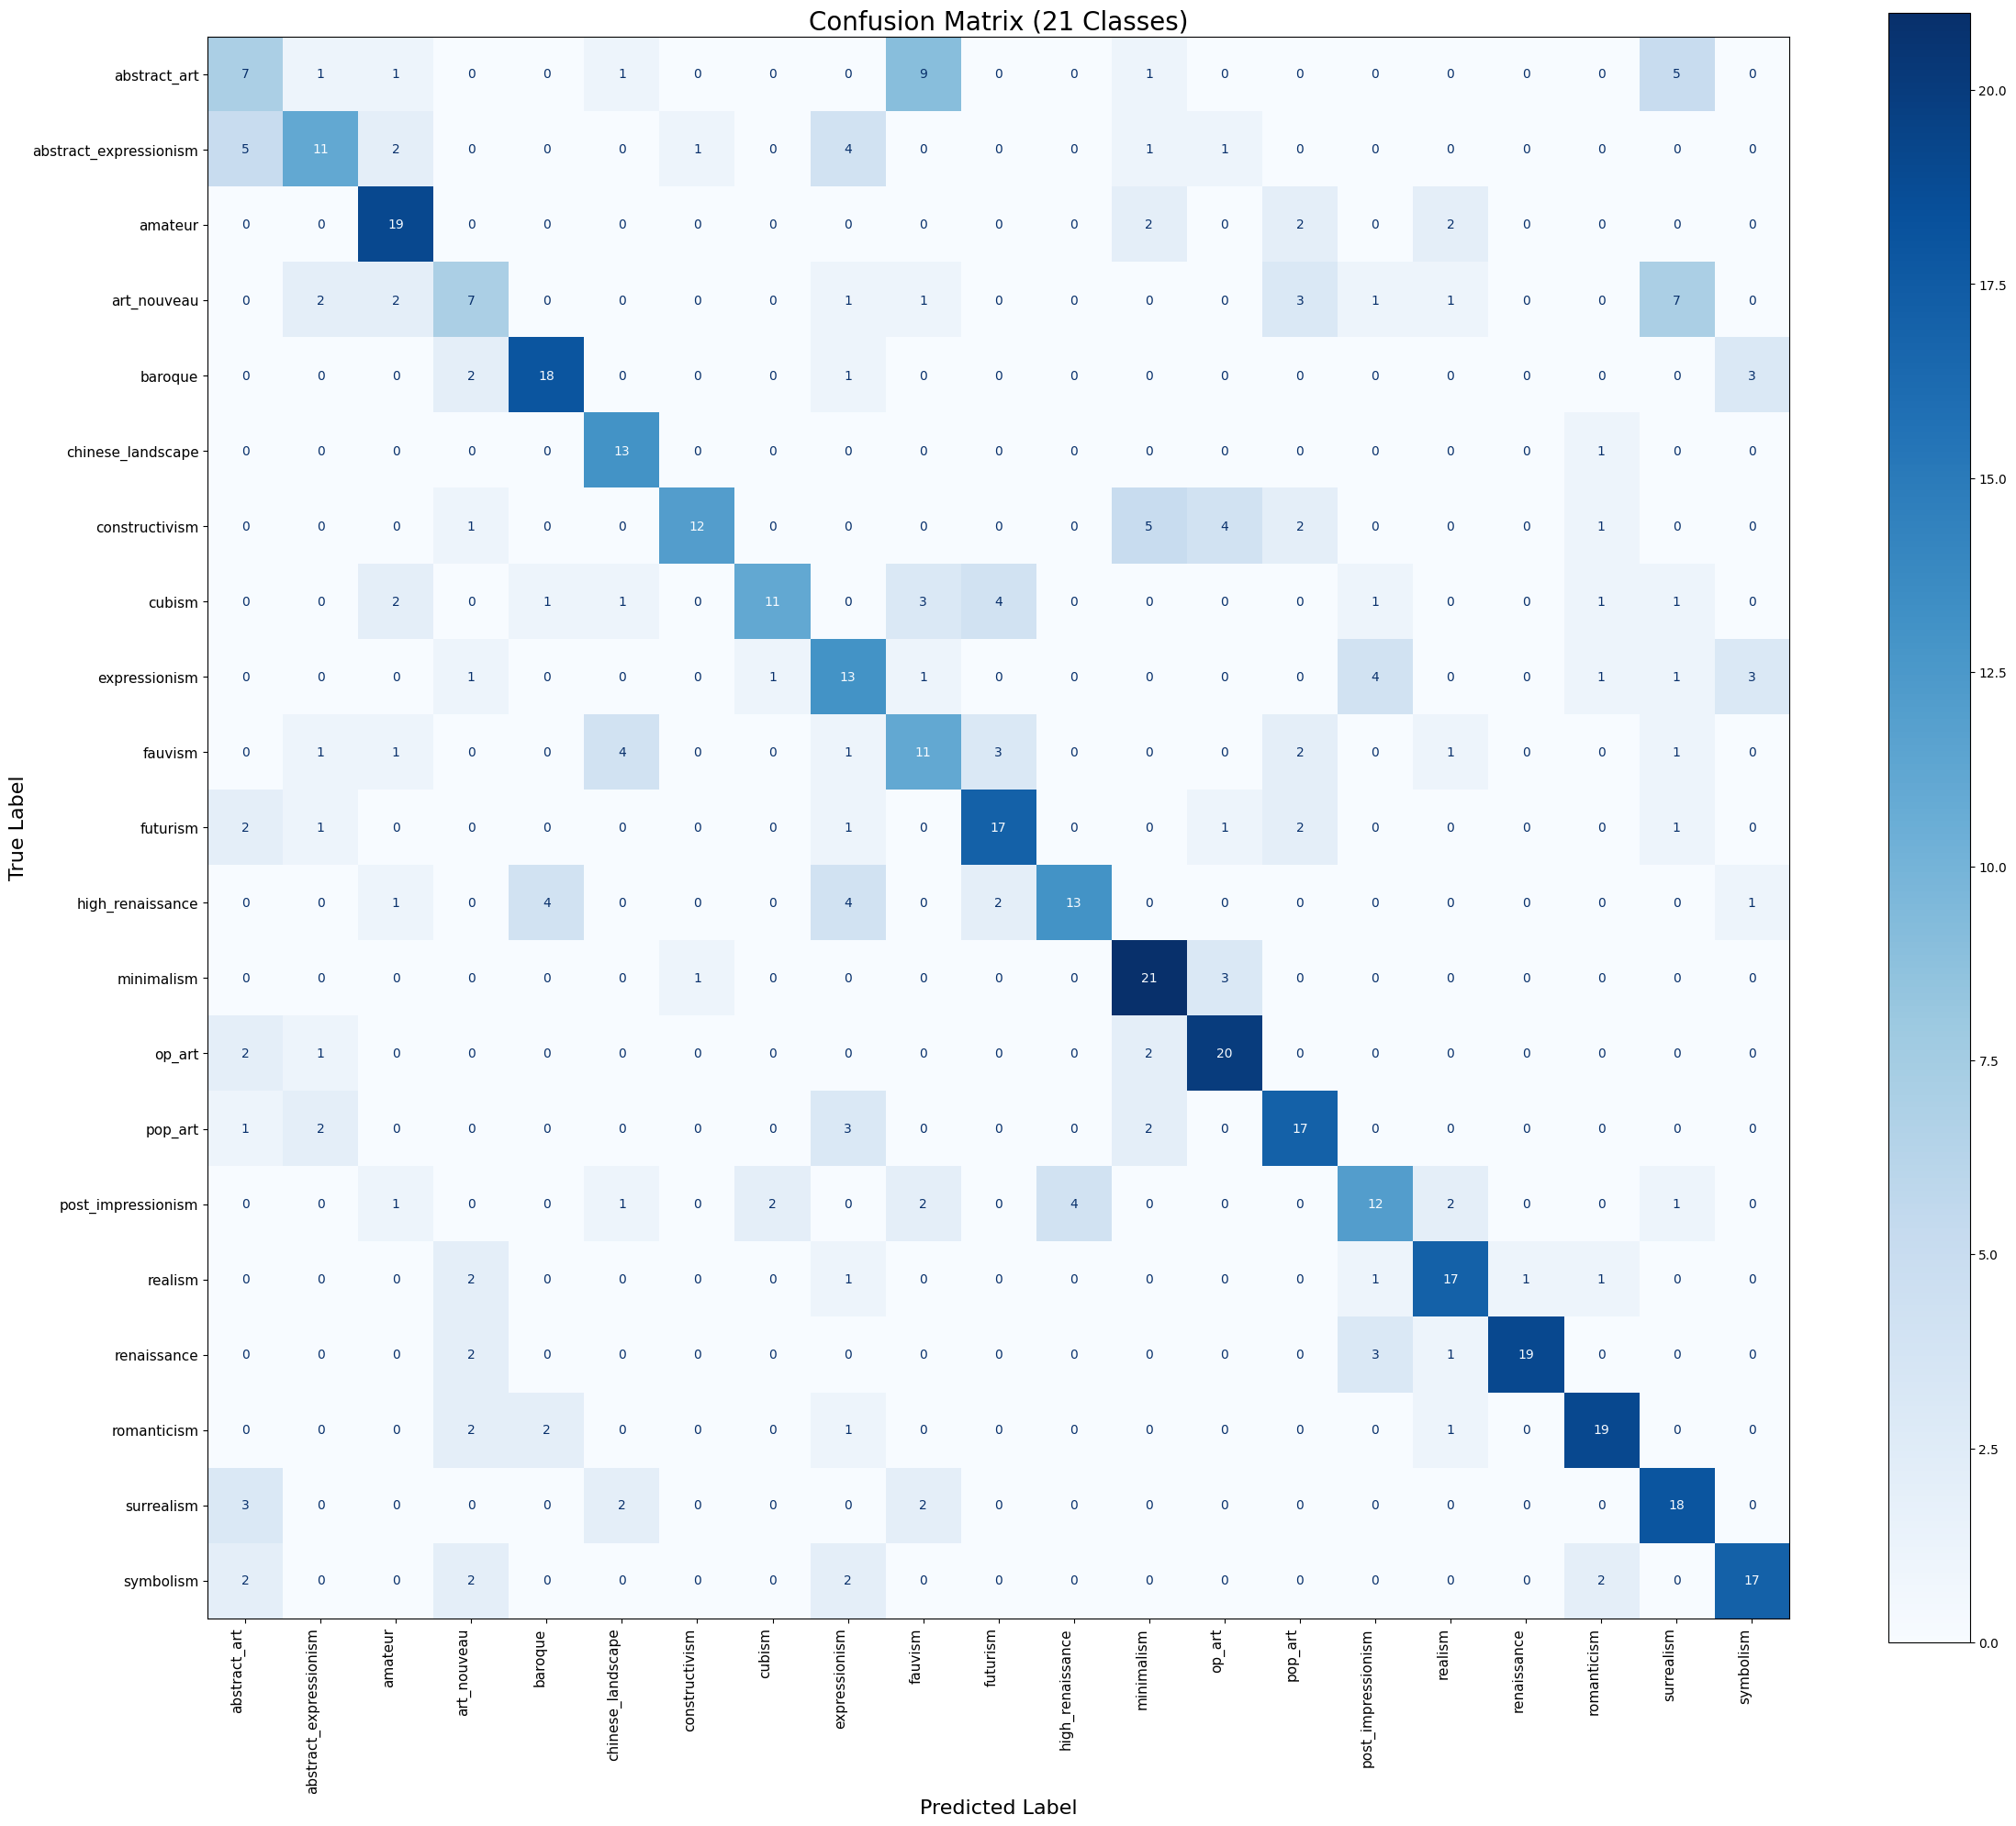

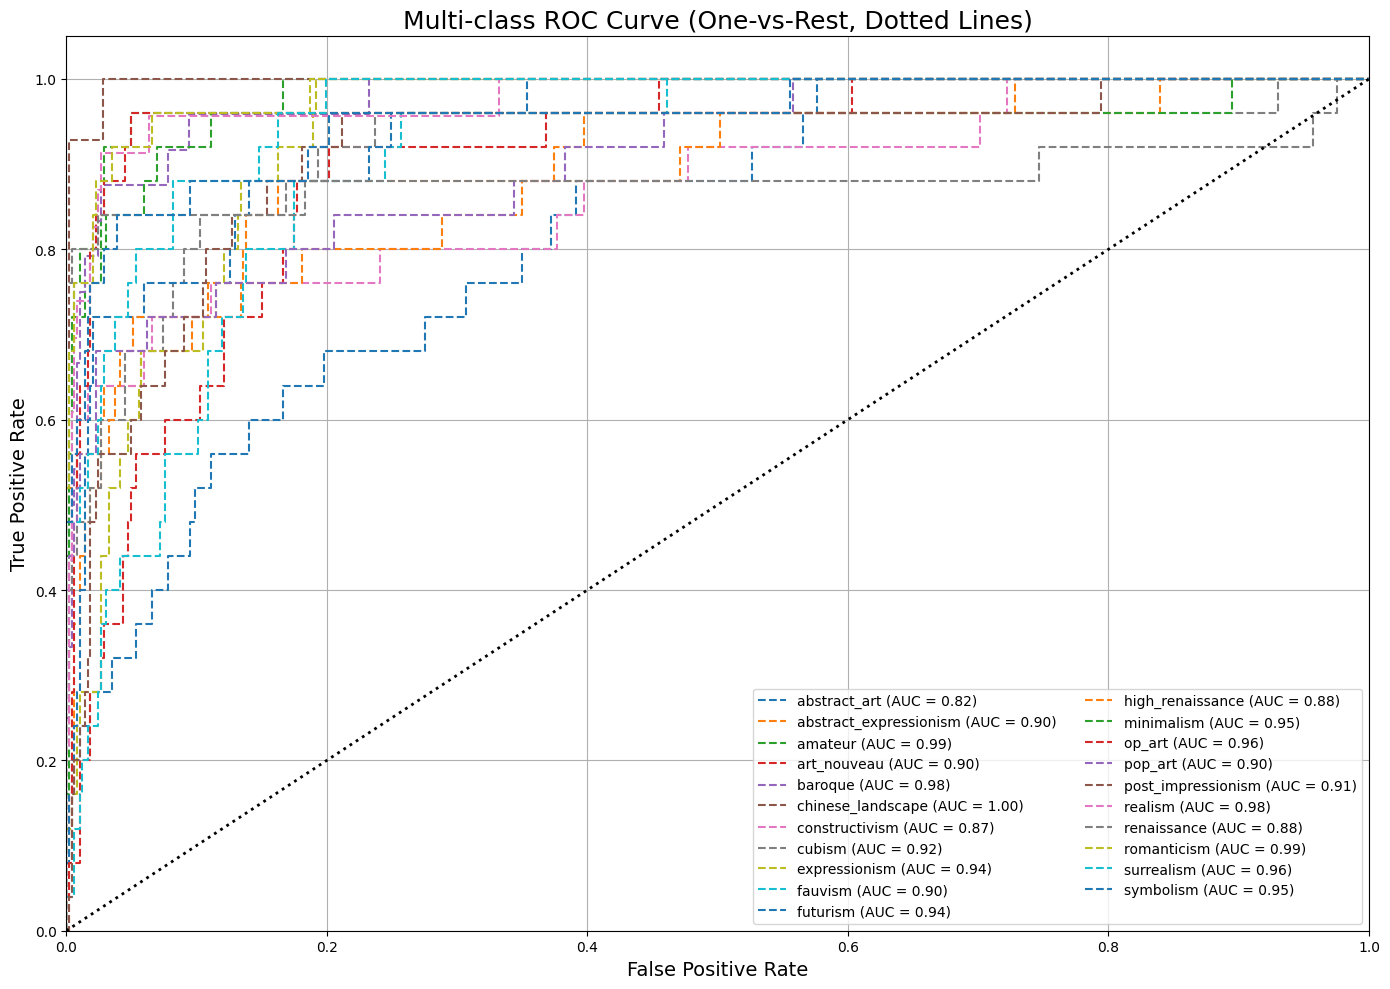

In [7]:
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

# ========== Define transforms ==========
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ========== Load the test dataset ==========
test_dataset = datasets.ImageFolder(
    '/content/MerakiNexus-V2/art_classification_model/dataset/test',
    transform=transform
)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)

# ========== Load TorchScript model ==========
scripted_model = torch.jit.load("/content/artwork_classification_model_subject_2_resNet_101.pth")
scripted_model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scripted_model.to(device)

# ========== Evaluation on Test Set ==========
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = scripted_model(images)
        probs = F.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# ========== Overall Test Accuracy ==========
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# ========== Precision, Recall, F1-Score ==========
report = classification_report(
    all_labels,
    all_preds,
    target_names=class_names,
    digits=3,
    output_dict=True
)
df_metrics = pd.DataFrame(report).transpose()
print("\n📊 Classification Report (per class):\n")
print(df_metrics[['precision', 'recall', 'f1-score']].round(3))

# Optional: Save report as CSV
# df_metrics.to_csv("classification_metrics_test.csv")

# ========== Confusion Matrix ==========
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(24, 20))
disp.plot(
    cmap="Blues",
    values_format='d',
    ax=ax
)

plt.setp(ax.get_xticklabels(), rotation=90, ha='right', fontsize=11)
plt.setp(ax.get_yticklabels(), fontsize=11)
ax.set_title("Confusion Matrix (21 Classes)", fontsize=20)
ax.set_xlabel("Predicted Label", fontsize=16)
ax.set_ylabel("True Label", fontsize=16)
plt.tight_layout()
plt.show()

# ========== ROC Curve ==========
# Binarize labels
y_true_bin = label_binarize(all_labels, classes=list(range(num_classes)))
y_score = np.array(all_probs)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class as dotted lines
plt.figure(figsize=(14, 10))
for i in range(num_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        linestyle='--',
        lw=1.5,
        label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})"
    )

plt.plot([0, 1], [0, 1], 'k:', lw=2)  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Multi-class ROC Curve (One-vs-Rest, Dotted Lines)", fontsize=18)
plt.legend(loc="lower right", fontsize=10, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()
